## Barier Tunneling in Quantum Mechnaics

#### Setting up Iterative Equations

Before going to simulate this quantum system, we first need to discuss the physics behind it. Lets start from 1D-time dependent Schrodinger Equation 
$$\iota \hbar \frac{\partial \Psi}{\partial t } = - \frac{\hbar^{2}}{2m}\frac{\partial^{2}\Psi}{\partial x^{2}}+ V\Psi(x)$$
which is a partial separable differential equation and can be separated as
$$
\Psi(x,t) = \psi(x) T(t)
$$
where
$$
-\frac{\hbar^{2}}{2m} \frac{\partial^{2}\psi}{\partial x^{2}}+V\psi = E\psi
$$
represents time independent Schrodinger equation. $E$ is energy here which is constant. One should have an iterative form of this equation to simulate it. There are also different approaches but the one that I will use here is finite differences method. The space dependent wave function $\psi$ can be brake into small components $\psi_{1},\psi_{2},...,\psi_{N}$, where N is finite. Each component is separated by $\Delta x $. We can define the derivate of the middle component using the two components which are jsut before and after that, such as
$$
\frac{\partial \psi_{i}}{\partial x} = \frac{\psi_{i+1} - \psi_{i-1}}{2 \Delta x}
$$
But we have a second derivative in our time independent Schrodinger equation, so
$$
\frac{\partial^{2} \psi_{i}}{\partial x^{2}} = \frac{\psi^{'}_{i+\frac{1}{2}}-\psi^{'}_{i-\frac{1}{2}}}{\Delta x}
$$
or 
$$
\frac{\partial^{2} \psi_{i}}{\partial x^{2}} = \frac{\psi_{i+1}-2\psi_{i}+\psi_{i-1}}{\Delta x^{2}}
$$
We can plugg in this expression in time independent Schrodinger equation, 
$$
-\frac{\hbar^{2}}{2m\Delta x^{2}}\left(\psi_{i+1}-2\psi_{i}+\psi_{i-1}\right) + V_{i}\psi_{i} = E \psi_{i}
$$
where $V_{i}$ is the individual potential at each point $i$. It can also be written as
$$
\frac{\hbar^{2}}{2m\Delta x^{2}}\left(\psi_{i+1}+\psi_{i-1}\right) + \left(\frac{\hbar^{2}}{2m\Delta x^{2}}+V_{i}\right) \psi_{i} = E\psi_{i}
$$
Suppose we have totall 5 splitted components of $\psi$ as $(\psi_{0},\psi_{1},\psi_{2},\psi_{3},\psi_{4})$. From these components, two are set $0$ to defien a boundary condition such that
$$
\psi_{0} = \psi_{4} = 0
$$
So, we are left with three unknowns $(\psi_{1},\psi_{2},\psi_{3})$, 
$$
\frac{\hbar^{2}}{2m\Delta x^{2}}\psi_{0} + \left(\frac{\hbar^{2}}{m\Delta x^{2}}+V_{1}\right) \psi_{1} - \frac{\hbar^{2}}{2m\Delta x^{2}}\psi_{2} = E\psi_{1}
$$
$$
\frac{\hbar^{2}}{2m\Delta x^{2}}\psi_{1} + \left(\frac{\hbar^{2}}{m\Delta x^{2}}+V_{2}\right) \psi_{2} - \frac{\hbar^{2}}{2m\Delta x^{2}}\psi_{3} = E\psi_{2}
$$
$$
\frac{\hbar^{2}}{2m\Delta x^{2}}\psi_{2} + \left(\frac{\hbar^{2}}{m\Delta x^{2}}+V_{3}\right) \psi_{3} - \frac{\hbar^{2}}{2m\Delta x^{2}}\psi_{4} = E\psi_{3}
$$
The contribution from $\psi_{0}$ and $\psi_{4}$ terms in first and third equation is zero since $\psi_{0}=\psi_{4}=0$.

#### Matrix Representation

The above mentioned equations can be written in matrix as
$$
\frac{\hbar^{2}}{2m\Delta x^{2}}\begin{pmatrix}
-2-kV_{1} & 1 & 0 \\
1 & -2-kV_{2} & 1 \\ 
0 & 1 & -2-kV_{3}
\end{pmatrix}
\begin{pmatrix}
\psi_{1} \\
\psi_{2} \\
\psi_{3}
\end{pmatrix} = E \begin{pmatrix}
\psi_{1} \\
\psi_{2} \\
\psi_{3}
\end{pmatrix}
$$
where 
$$
k = \frac{2m\Delta x^{2}}{\hbar^{2}}
$$
We have now brought to a clear picture. We can see it becomes an eigenvalue problem, where E represents the eiggenvalue.

#### What We Gonna Do Next ?

Upon solving the above eigenvalue problem, we can find different eigenstates $ \left(\psi_{n}(x)\right)$ corressponding to different eigenvalues$E_{n}$. We can use superposition to construct a wave vector such that
$$
\Psi(x,t) = \sum_{n} a_{n}\psi_{n}(x)e^{-\frac{\iota E_{m} t }{\hbar}}
$$
where the weights/constants are,
$$
a_{n} = \int_{-\infty}^{\infty} \psi_{n}^{*}(x)\Psi(x,t_{0}) dx
$$
where $t_{0}$ is some initial time. \\
We'll start with an iniitial wave function
$$
\Psi(x,0) = e^{-\frac{\left(x+x_{0}\right)^{2}}{\sigma}} e^{\iota p(x+x_{0})}
$$
and 
$$
V_{0} = \frac{p^{2}}{2m}
$$
which defines the height of the barrier. We'll set the values during simulation.

#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vpython
from vpython import rate, gcurve, graph, canvas, color

<IPython.core.display.Javascript object>

#### Variable and Plotting Barrier

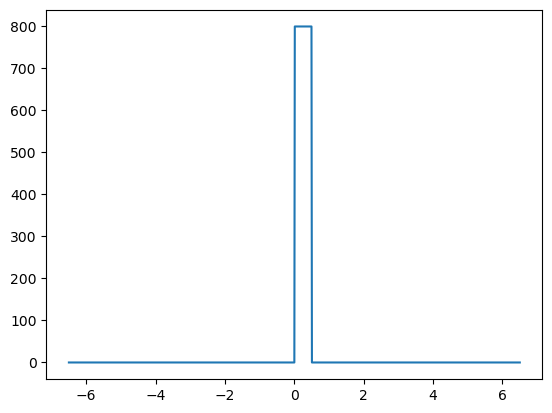

In [2]:
m = 1
hbar = 1
xmin = -6.5
xmax = 6.5
N = 1000
x = np.linspace(xmin,xmax,N+1)
dx = x[1]-x[0]
p = 40
V0 = p**2/2*m
sig = 0.15
x0 = 2
V = 0*x
for i in range (len(V)):
    if x[i]>0 and x[i]<0.5:
        V[i] = V0 
plt.plot(x,V)

####  Initial Wavefunction and Normalization

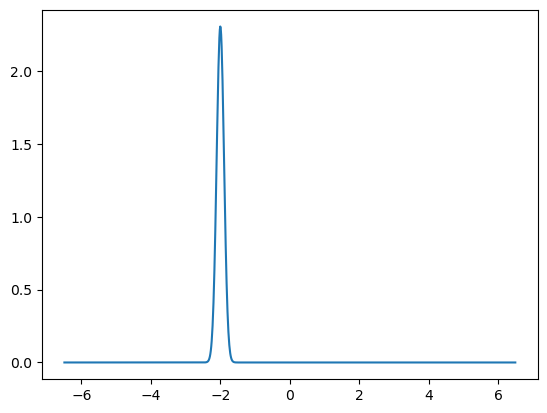

In [3]:
Psi0=np.exp(-(x[1:-1]+x0)**2/sig**2)*np.exp(1j*p*(x[1:-1]+x0))
A = np.sum(np.abs(Psi0)**2*dx)
Psi0 = Psi0/np.sqrt(A)
plt.plot(x[1:-1],np.abs(Psi0))

#### Hamiltonian Matrix

In [4]:
H = (hbar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)
# print(H.shape)

#### Eigenvalues and Eigenvectors

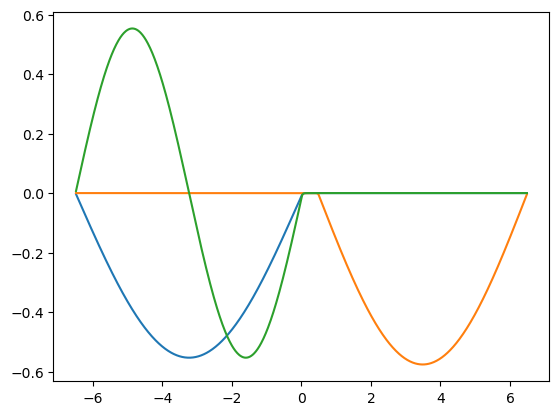

In [5]:
E,psi = np.linalg.eigh(H)
psi = psi.T
A = np.sum(np.abs(psi[0])**2*dx)
psi = psi/np.sqrt(A) 
plt.plot(x[1:-1],psi[0])
plt.plot(x[1:-1],psi[1])
plt.plot(x[1:-1],psi[2])

In [10]:
from vpython import*
from vpython import rate, gcurve, graph, canvas, color
scene = canvas()
g1 = graph(xtitle="x",ytitle="Amplitude",width=500, height=250)
f1 = gcurve(color=color.black)
fV = gcurve(color=color.red)

for i in range(len(V)):
    fV.plot(x[i],0.003*V[i])

c = 0*Psi0
for i in range(len(c)):
    c[i] = np.sum(np.conj(psi[i])*Psi0*dx)

t = 0
dt = 0.001
while t<0.5:
    rate(20)
    Psi = 0*psi[0]
    fdata = []
    for i in range(len(c)):
        Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
    for i in range(len(Psi)):
        fdata = fdata +[[x[i],np.abs(Psi[i])]]
    f1.data = fdata
    t = t + dt

<IPython.core.display.Javascript object>